In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.patches as patches

import astropy
from astropy.io import fits

import numpy as np

#pipeline
import jwst
from jwst.pipeline import Detector1Pipeline
from jwst.pipeline import Image2Pipeline
from jwst.pipeline import Image3Pipeline
from jwst.pipeline import Spec2Pipeline
from jwst.pipeline import Spec3Pipeline
#wcs
from jwst import assign_wcs
from jwst.assign_wcs import assign_wcs_step
from jwst.assign_wcs import AssignWcsStep
from jwst.extract_2d import Extract2dStep
#datamodels
from jwst import datamodels

In [2]:
datamodels.__file__

'/Users/dencheva/opt/anaconda3/envs/review/lib/python3.9/site-packages/jwst/datamodels/__init__.py'

In [3]:
# spec file
#im=datamodels.open('jw01089001001_01101_00001_nis_uncal.fits')

# args = ["calwebb_image3","mosaic_f200_asn.json"]
# Image3Pipeline.from_cmdline(args)

In [4]:
specwcs = '/Users/dencheva/dev/jwst/swara-v3/WFSS-V3-transforms-test-ND/jwst_niriss_specwcs_2.asdf'
spc=datamodels.open(specwcs)
spc.meta.instrument.instance

{'detector': 'NIS',
 'filter': 'GR150R.conf',
 'name': 'NIRISS',
 'pupil': 'F200W'}

In [5]:
# Process one grism observation using the new reference file

fname = "jw01089001001_01101_00002_nis_rate.fits"
astep = AssignWcsStep()
out = astep.call(fname, override_specwcs=specwcs)


2022-05-01 09:27:45,628 - stpipe.AssignWcsStep - INFO - AssignWcsStep instance created.
2022-05-01 09:27:46,465 - stpipe.AssignWcsStep - INFO - AssignWcsStep instance created.
2022-05-01 09:27:46,533 - stpipe.AssignWcsStep - INFO - Step AssignWcsStep running with args ('jw01089001001_01101_00002_nis_rate.fits',).
2022-05-01 09:27:46,535 - stpipe.AssignWcsStep - INFO - Step AssignWcsStep parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'sip_approx': True, 'sip_max_pix_error': 0.25, 'sip_degree': None, 'sip_max_inv_pix_error': 0.25, 'sip_inv_degree': None, 'sip_npoints': 32, 'slit_y_low': -0.55, 'slit_y_high': 0.55}
2022-05-01 09:27:47,150 - stpipe.AssignWcsStep - INFO - COMPLETED assign_wcs
2022-05-01 09:27:47,165 - stpipe.AssignWcsStep - INFO - Step AssignWcsStep done


In [6]:
out.meta.instrument.instance

{'detector': 'NIS',
 'filter': 'GR150R',
 'filter_position': 33.5667,
 'focus_position': 0.0,
 'name': 'NIRISS',
 'pupil': 'F200W',
 'pupil_position': 164.8715}

In [ ]:
!ls *i2d*

In [ ]:
!ls *ecsv

In [7]:
out.meta.source_catalog="my_mosaic_f200_cat.ecsv"
exout = Extract2dStep.call(out, mmag_extract=19)
exout.save("jw01089001001_01101_00002_nis_ex2d.fits")

2022-05-01 09:27:51,528 - stpipe.Extract2dStep - INFO - Extract2dStep instance created.
2022-05-01 09:27:51,610 - stpipe.Extract2dStep - INFO - Step Extract2dStep running with args (<ImageModel(2048, 2048) from jw01089001001_01101_00002_nis_rate.fits>,).
2022-05-01 09:27:51,612 - stpipe.Extract2dStep - INFO - Step Extract2dStep parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'slit_name': None, 'extract_orders': None, 'tsgrism_extract_height': None, 'wfss_extract_half_height': 5, 'grism_objects': None, 'mmag_extract': 19}
2022-05-01 09:27:51,638 - stpipe.Extract2dStep - INFO - EXP_TYPE is NIS_WFSS
2022-05-01 09:27:51,664 - stpipe.Extract2dStep - INFO - Extracting objects < abmag = 19
2022-05-01 09:27:51,665 - stpipe.Extract2dStep - INFO - Getting objects from my_mosaic_f

'jw01089001001_01101_00002_nis_ex2d.fits'

<IPython.core.display.Javascript object>


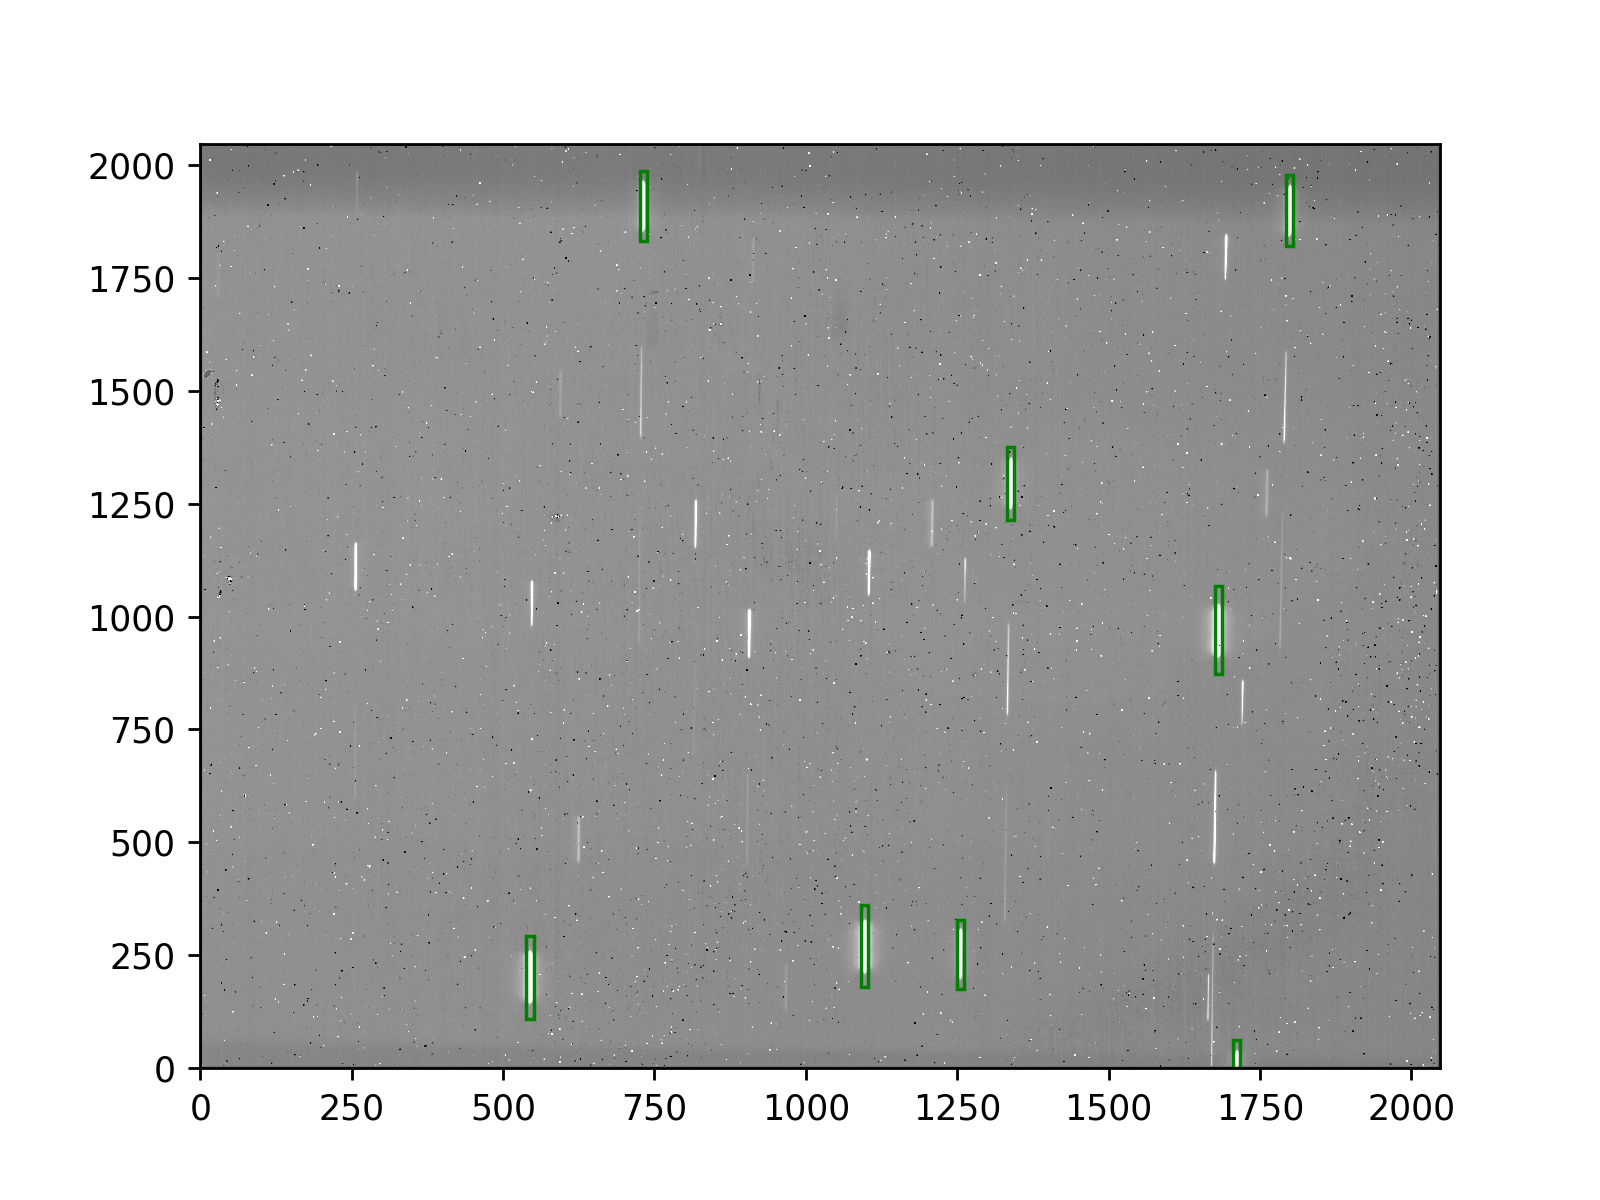

xstart   1707 1
xstart   540 110
xstart   1251 177
xstart   1093 180
xstart   1677 874
xstart   1334 1216
xstart   1795 1822
xstart   727 1834


In [12]:
ax = plt.subplot()
ax.imshow(out.data, aspect='auto', vmin=-1, vmax=1.4, origin='lower')
plt.gray()

for slit in exout.slits:
    #ax.scatter(slit.source_ypos, slit.source_xpos)
    bbox = slit.meta.wcs.bounding_box
    xstart, ystart = slit.xstart, slit.ystart
    print('xstart  ', xstart, ystart)
    #print(slit.meta.wcsinfo.spectral_order)
    ax.add_patch(patches.Rectangle((bbox[0][0]+xstart-1, bbox[1][0]+ystart-1), 
                                   bbox[0][1]-bbox[0][0], bbox[1][1]-bbox[1][0], edgecolor='g',
                                  fill=False))
    #ax.scatter(slit.source_xpos, slit.source_ypos, c='r')

plt.gray()

In [10]:
plt.savefig('V3_R')

In [ ]:
# for slit in exout.slits:
#     print('xstart  ', xstart, ystart)
#     print(slit.meta.wcsinfo.spectral_order)

In [ ]:
from jwst.assign_wcs import util

gobjects=util.get_object_info('my_mosaic_f200_cat.ecsv')


In [ ]:
gobjects[84]


In [ ]:
grism_objects = []
for obj in gobjects:
    if (obj.isophotal_abmag is not None and 
        obj.isophotal_abmag < 19):
            grism_objects.append(obj)
            

In [ ]:
len(grism_objects)

In [ ]:
[o.label for o in grism_objects]

In [ ]:
obj=grism_objects[-1]
obj

In [ ]:
wobj=exout.slits[-1].meta.wcs
wobj.invert(254.7170586, 34.33200704, 1.98, 1)

In [ ]:
ra = np.array([obj.sky_bbox_ll.ra.value, obj.sky_bbox_lr.ra.value,
               obj.sky_bbox_ul.ra.value, obj.sky_bbox_ur.ra.value])
dec = np.array([obj.sky_bbox_ll.dec.value, obj.sky_bbox_lr.dec.value,
                obj.sky_bbox_ul.dec.value, obj.sky_bbox_ur.dec.value])

In [ ]:
wobj.invert(ra, dec, 1.98, 1)

In [ ]:
print(wobj.invert(ra, dec, 1.7, 1))
print(wobj.invert(ra, dec, 2.28, 1))

In [ ]:
wobj.get_transform('world', 'detector')(ra, dec, 1.98, 1)

In [ ]:
wobj.get_transform('world', 'detector')(254.7170586, 34.33200704, 1.98, 1)

In [ ]:
wobj.get_transform('detector', 'grism_detector')(733.9475885933907, 2115.843541524623, 1.98, 1.0)

In [ ]:
wobj.get_transform('detector', 'grism_detector')(733.9475885933907, 2115.843541524623, 1.98, 2)

In [ ]:
exout.meta.wcsinfo.dispersion_direction

In [ ]:
not obj.is_extended
refs={'wavelengthrange': 'jwst_niriss_wavelengthrange_0002.asdf'}

In [ ]:
grobj=util.create_grism_bbox(out, refs, mmag_extract=19,extract_orders=[1],
                       wfss_extract_half_height=5,
                      wavelength_range={1: (1.7, 2.28)})

In [ ]:
grobj[-1]

In [ ]:
[obj.order_bounding[1][::-1] for obj in grobj]

In [ ]:
bb=exout.slits[-1].meta.wcs.bounding_box
y,x = bb
print(bb)
print(y, x)

In [ ]:
bb['x0'][0]+xstart, bb['x1'][1]+xstart

In [ ]:
from jwst.extract_2d import grisms
grisms.clamp(bb['x0'],0, 859)

In [ ]:
ls *i2d*